In [145]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [146]:
#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

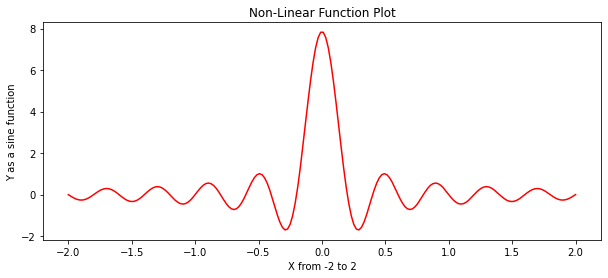

In [147]:
torch.manual_seed(1)
np.random.seed(1)

x = torch.unsqueeze(torch.linspace(2,-2,200),dim=1)
y = (np.sin(5*np.pi*x))/(2*x)

#convert into tensors for pytorch
x = x.clone().detach()
y = y.clone().detach()

#plot the non linear function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Non-Linear Function Plot')
plt.ylabel('Y as a sine function')
plt.xlabel('X from -2 to 2')

plt.show()

In [148]:
#Define model 1 
model_one = nn.Sequential(
                nn.Linear(1,5),
                nn.ReLU(),
                nn.Linear(5,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,5),
                nn.ReLU(),
                nn.Linear(5,1)
                )

In [149]:
#Optimizer with model one parameter
optimizer_SGD = optim.SGD(model_one.parameters(), lr=0.01, momentum=0.9)

In [150]:
#loss function mean squared error
mean_s_loss_func = torch.nn.MSELoss() 

In [151]:
def gradientNormLoop(model,x,y,epoch_range):
    n_epoch = []
    n_epoch_err = []
    n_gradient_norm = []
    for epoch in range(epoch_range):
        n_epoch.append(epoch)
        y_predicted = model(x)
        loss = mean_s_loss_func(y_predicted, y)
        loss.backward()
        n_epoch_err.append(loss.detach().numpy())
        optimizer_SGD.step()
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        n_gradient_norm.append(grad_norm)
        optimizer_SGD.zero_grad()
        
        if epoch%500 == 0:
            print('Epoch ', epoch,' Loss ', loss.detach().numpy())
    return n_epoch,n_epoch_err,n_gradient_norm

In [152]:
model_one_epochs,model_one_err,model_one_prediction = gradientNormLoop(model_one,x,y,20000)

Epoch  0  Loss  2.8955865
Epoch  500  Loss  2.8911364
Epoch  1000  Loss  2.8911273
Epoch  1500  Loss  2.8911037
Epoch  2000  Loss  2.8910258
Epoch  2500  Loss  2.890407
Epoch  3000  Loss  0.47463393
Epoch  3500  Loss  0.10876614
Epoch  4000  Loss  0.075126976
Epoch  4500  Loss  0.06791179
Epoch  5000  Loss  0.09489952
Epoch  5500  Loss  0.06825542
Epoch  6000  Loss  0.059186846
Epoch  6500  Loss  0.059866868
Epoch  7000  Loss  0.05505095
Epoch  7500  Loss  0.053141855
Epoch  8000  Loss  0.054417554
Epoch  8500  Loss  0.048549347
Epoch  9000  Loss  0.04593643
Epoch  9500  Loss  0.030843545
Epoch  10000  Loss  0.02996479
Epoch  10500  Loss  0.028441656
Epoch  11000  Loss  0.025287587
Epoch  11500  Loss  0.025301235
Epoch  12000  Loss  0.02551385
Epoch  12500  Loss  0.024747262
Epoch  13000  Loss  0.024763322
Epoch  13500  Loss  0.024827125
Epoch  14000  Loss  0.024743402
Epoch  14500  Loss  0.024685144
Epoch  15000  Loss  0.024613326
Epoch  15500  Loss  0.024603548
Epoch  16000  Loss  0.

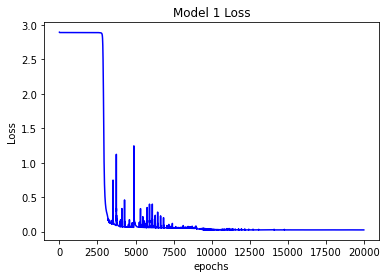

In [153]:
#plot model one epoch vs loss
axis_range = [i for i in range(len(model_one_err))]
plt.plot(model_one_epochs,model_one_err,color="blue")
plt.title('Model 1 Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

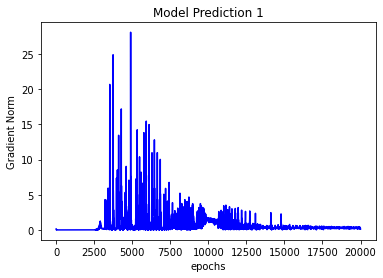

In [154]:
#plot model one predicted and actual
#plt.plot(x.numpy(),y.numpy(),color="black")
#axis_range = [i for i in range(len(model_one_prediction))]
plt.plot(model_one_epochs,model_one_prediction,color="blue")
plt.title('Model Prediction 1')
plt.xlabel('epochs')
plt.ylabel('Gradient Norm')
plt.show()

In [155]:
print(model_one_prediction[5])

0.09997600125171946
